# Import packages and data 

In [1]:
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from scipy import sparse

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the SS2 FBM dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_ss2/data/ss2_validation_raw_20200401.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 570 × 56063 
    obs: 'barcode', 'cell.labels', 'tissue', 'orig.ident', 'minibulk_or_ss', 'well_ID'

In [6]:
adata.shape

(570, 56063)

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
34+             36
B cell          72
DC1             36
DC2             24
Mono            33
PMN             65
basophil        24
eosinophil      60
mast cell       60
myelocyte       68
pDC             36
promyelocyte    56
dtype: int64

In [8]:
adata.raw = adata

In [9]:
# filter for genes in at least 3 cells and cells with at least 200 genes 
sc.pp.filter_cells(adata, min_genes=200) # Keep all cells with at least 200 detected genes
sc.pp.filter_genes(adata, min_cells=3) # Keep all genes expressed in >= 3 cells. 

In [10]:
adata.shape

(486, 25064)

In [11]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
34+             32
B cell          52
DC1             34
DC2             15
Mono            32
PMN             65
basophil        20
eosinophil      54
mast cell       47
myelocyte       61
pDC             30
promyelocyte    44
dtype: int64

In [12]:
adata.obs["dataset"] = "SS2"
adata.obs["sequencing.type"] = "SS2"

In [13]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [14]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
SS2_34+             32
SS2_B cell          52
SS2_DC1             34
SS2_DC2             15
SS2_Mono            32
SS2_PMN             65
SS2_basophil        20
SS2_eosinophil      54
SS2_mast cell       47
SS2_myelocyte       61
SS2_pDC             30
SS2_promyelocyte    44
dtype: int64

In [15]:
pd.DataFrame(adata.obs).to_csv('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/ss2_meta_20210105.csv')

In [16]:
ss2 = adata

# Load the 10X FBM dataset

In [17]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [18]:
adata

AnnData object with n_obs × n_vars = 103228 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'nk_meta', 'mito.threshold'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [19]:
adata.shape

(103228, 33712)

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

In [21]:
subset_celltypes = ["HSC", "naive B cell", "DC1", "DC2", "CD14 monocyte", "neutrophil", "basophil", "eosinophil", "mast cell", "promyelocyte", "myelocyte", "pDC"]
adata = adata[adata.obs['cell.labels'].isin(subset_celltypes)].copy()

In [22]:
adata.shape

(23220, 33712)

In [23]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte    8763
DC1                50
DC2               598
HSC                92
basophil          139
eosinophil        321
mast cell         648
myelocyte        3794
naive B cell     1411
neutrophil       4501
pDC               712
promyelocyte     2191
dtype: int64

In [24]:
adata.obs["dataset"] = "10X"

In [25]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [26]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    8763
10X_DC1                50
10X_DC2               598
10X_HSC                92
10X_basophil          139
10X_eosinophil        321
10X_mast cell         648
10X_myelocyte        3794
10X_naive B cell     1411
10X_neutrophil       4501
10X_pDC               712
10X_promyelocyte     2191
dtype: int64

# Downsample the 10X data 

In [27]:
tot_adata = anndata.AnnData
for i in adata.obs["cell.labels"].unique().tolist():
    print(i)
    subset = adata[adata.obs['cell.labels'].isin([i])].copy()
    print(subset.shape)
    sc.pp.subsample(subset, n_obs = 50)
    print(subset.shape)
    tot_adata = tot_adata.concatenate(subset, join='outer', index_unique=None)

neutrophil
(4501, 33712)
(50, 33712)
CD14 monocyte
(8763, 33712)
(50, 33712)
myelocyte
(3794, 33712)
(50, 33712)
mast cell
(648, 33712)
(50, 33712)
eosinophil
(321, 33712)
(50, 33712)
promyelocyte
(2191, 33712)
(50, 33712)
pDC
(712, 33712)
(50, 33712)
DC2
(598, 33712)
(50, 33712)
naive B cell
(1411, 33712)
(50, 33712)
DC1
(50, 33712)
(50, 33712)
HSC
(92, 33712)
(50, 33712)
basophil
(139, 33712)
(50, 33712)


In [28]:
adata = tot_adata

In [29]:
adata.shape

(600, 33712)

In [30]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    50
10X_DC1              50
10X_DC2              50
10X_HSC              50
10X_basophil         50
10X_eosinophil       50
10X_mast cell        50
10X_myelocyte        50
10X_naive B cell     50
10X_neutrophil       50
10X_pDC              50
10X_promyelocyte     50
dtype: int64

In [31]:
adata_10x = adata

# Merge the validation dataset

In [32]:
merged = adata_10x.concatenate(ss2, index_unique=None, join='outer')

In [33]:
merged.shape

(1086, 42802)

In [34]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    50
10X_DC1              50
10X_DC2              50
10X_HSC              50
10X_basophil         50
10X_eosinophil       50
10X_mast cell        50
10X_myelocyte        50
10X_naive B cell     50
10X_neutrophil       50
10X_pDC              50
10X_promyelocyte     50
SS2_34+              32
SS2_B cell           52
SS2_DC1              34
SS2_DC2              15
SS2_Mono             32
SS2_PMN              65
SS2_basophil         20
SS2_eosinophil       54
SS2_mast cell        47
SS2_myelocyte        61
SS2_pDC              30
SS2_promyelocyte     44
dtype: int64

In [35]:
merged

AnnData object with n_obs × n_vars = 1086 × 42802 
    obs: 'april_cell.labels', 'barcode', 'batch', 'cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'dataset', 'dataset_cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'minibulk_or_ss', 'mito.threshold', 'nGene', 'nUMI', 'n_genes', 'nk_meta', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'tissue', 'well_ID'
    var: 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0', 'ge

In [36]:
adata = merged

In [37]:
adata.shape

(1086, 42802)

In [38]:
adata.X

<1086x42802 sparse matrix of type '<class 'numpy.float32'>'
	with 2984157 stored elements in Compressed Sparse Row format>

In [39]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [40]:
adata.X

<1086x42802 sparse matrix of type '<class 'numpy.float32'>'
	with 2984157 stored elements in Compressed Sparse Row format>

# Change colours for UMAP plot

In [41]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')
adata.obs["dataset_cell.labels"].cat.categories

Index(['10X_CD14 monocyte', '10X_DC1', '10X_DC2', '10X_HSC', '10X_basophil', '10X_eosinophil', '10X_mast cell', '10X_myelocyte', '10X_naive B cell', '10X_neutrophil', '10X_pDC', '10X_promyelocyte', 'SS2_34+', 'SS2_B cell', 'SS2_DC1', 'SS2_DC2', 'SS2_Mono', 'SS2_PMN', 'SS2_basophil', 'SS2_eosinophil', 'SS2_mast cell', 'SS2_myelocyte', 'SS2_pDC', 'SS2_promyelocyte'], dtype='object')

In [42]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories([ 
'10X_HSC', 'SS2_34+', '10X_promyelocyte', 'SS2_promyelocyte', '10X_myelocyte', 'SS2_myelocyte',  
'10X_neutrophil', 'SS2_PMN', '10X_mast cell',
'SS2_mast cell', '10X_eosinophil', 'SS2_eosinophil', '10X_basophil', 'SS2_basophil', '10X_CD14 monocyte', 
'SS2_Mono', '10X_pDC', 'SS2_pDC', '10X_naive B cell', 'SS2_B cell', '10X_DC1', 'SS2_DC1', '10X_DC2',  'SS2_DC2'])               

In [43]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')
adata.obs["dataset_cell.labels"].cat.categories

Index(['10X_HSC', 'SS2_34+', '10X_promyelocyte', 'SS2_promyelocyte', '10X_myelocyte', 'SS2_myelocyte', '10X_neutrophil', 'SS2_PMN', '10X_mast cell', 'SS2_mast cell', '10X_eosinophil', 'SS2_eosinophil', '10X_basophil', 'SS2_basophil', '10X_CD14 monocyte', 'SS2_Mono', '10X_pDC', 'SS2_pDC', '10X_naive B cell', 'SS2_B cell', '10X_DC1', 'SS2_DC1', '10X_DC2', 'SS2_DC2'], dtype='object')

In [44]:
adata.obs["dataset_cell.labels"].cat.categories[2]

'10X_promyelocyte'

In [45]:
#new_colors = np.array(adata.uns["dataset_cell.labels_colors"])

new_colors = np.array(adata.obs["dataset_cell.labels"].cat.categories)

new_colors[[0]] = '#f9f06c' # 10X HSC
new_colors[[1]] = '#f9f06c' # SS2 HSC
new_colors[[2]] = '#bb7784' # 10X promyelocyte
new_colors[[3]] = '#bb7784' # SS2 promyelocyte
new_colors[[4]] = '#e07b91' # 10X myelocyte
new_colors[[5]] = '#e07b91' # SS2 myelocyte
new_colors[[6]] = '#f3c3db'# 10X neutrophil
new_colors[[7]] = '#f3c3db' # SS2 neutrophil
new_colors[[8]] = '#87288a'# 10X mast cell
new_colors[[9]] = '#87288a' # SS2 mast cell
new_colors[[10]] = '#ad83bb' # 10X eosinophil
new_colors[[11]] = '#ad83bb' # SS2 eosinophil
new_colors[[12]] = '#aaaad5' # 10X basophil
new_colors[[13]] = '#aaaad5' # SS2 basophil
new_colors[[14]] = '#86b3e0'# 10X CD14 monocyte
new_colors[[15]] = '#86b3e0' # SS2 monocyte
new_colors[[16]] = '#0b773c' # 10X pDC
new_colors[[17]] = '#0b773c' # SS2 pDC
new_colors[[18]] = '#d1db94' # 10X naive B cell
new_colors[[19]] = '#d1db94' # SS2 B cell
new_colors[[20]] = '#4d78bc' # 10X DC1
new_colors[[21]] = '#4d78bc' # SS2 DC1
new_colors[[22]] = '#64c5e4'# 10X DC2
new_colors[[23]] = '#64c5e4' # SS2 DC2

adata.uns["dataset_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f9f06c', '#bb7784', '#bb7784', '#e07b91', '#e07b91',
       '#f3c3db', '#f3c3db', '#87288a', '#87288a', '#ad83bb', '#ad83bb',
       '#aaaad5', '#aaaad5', '#86b3e0', '#86b3e0', '#0b773c', '#0b773c',
       '#d1db94', '#d1db94', '#4d78bc', '#4d78bc', '#64c5e4', '#64c5e4'],
      dtype=object)

# Pre-process the datasets 

In [46]:
# normalise count data
sc.pp.normalize_total(adata)

In [47]:
# log the count data
sc.pp.log1p(adata)

In [48]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [49]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Add snn and dimensional reduction (incl. PCA, UMAP)

In [50]:
# run pca
sc.tl.pca(adata, n_comps=50)

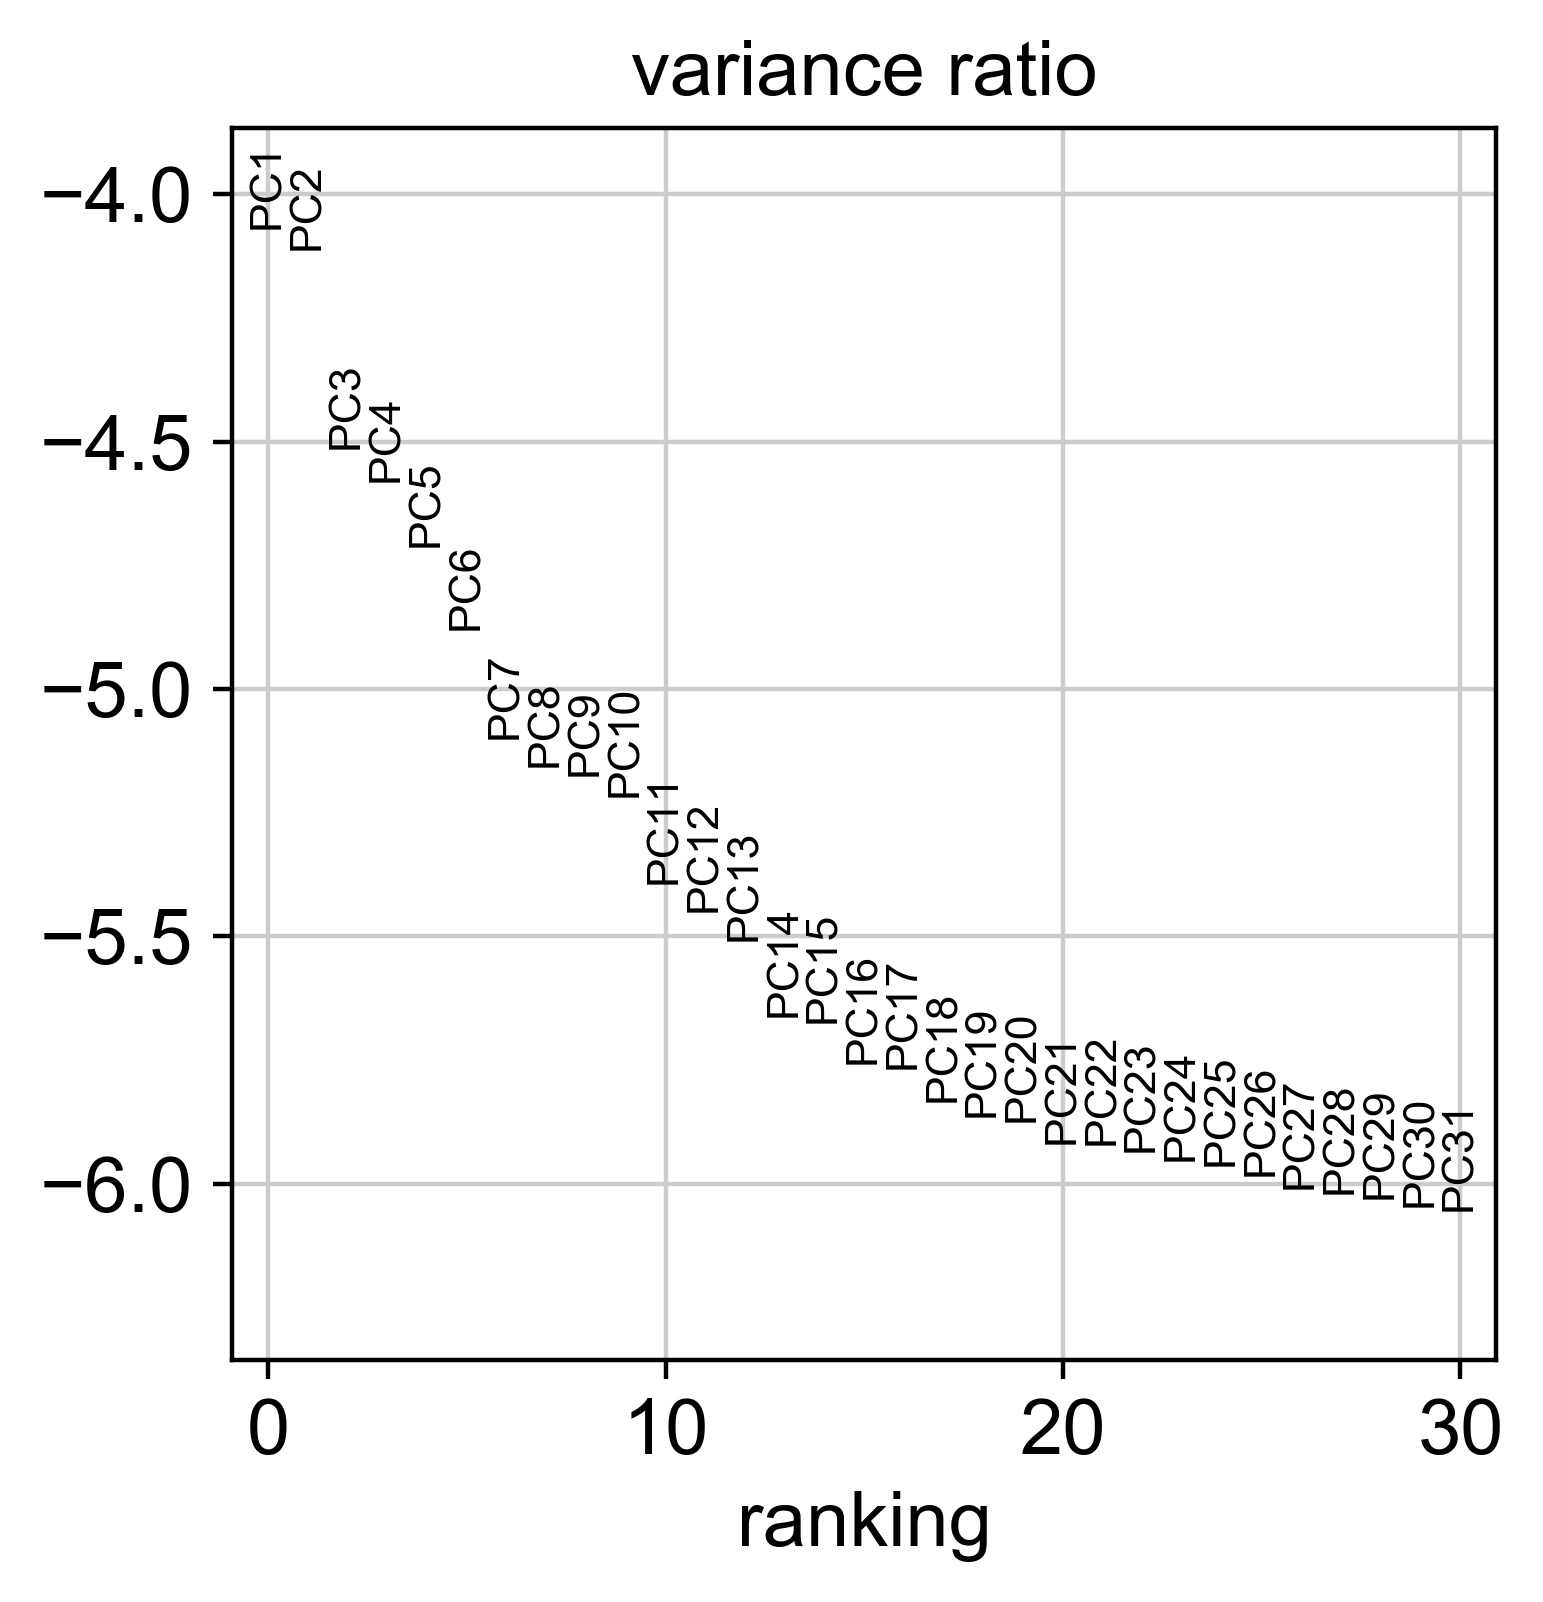

In [51]:
# have a look at pc's in order to choose number of pcs that will be used downstream. 
sc.pl.pca_variance_ratio(adata, log=True)

In [52]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20) 

In [53]:
# run umap
sc.tl.umap(adata) 

... storing 'april_cell.labels' as categorical
... storing 'barcode' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'dataset' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'minibulk_or_ss' as categorical
... storing 'mito.threshold' as categorical
... storing 'nk_meta' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sequencing.type' as categorical
... storing 'sort.ids' as categorical
... storing 'tissue' as categorical
... storing 'well_ID' as categorical
... storing 'gene_ids-1-0-0-0-0-0-0-0-0

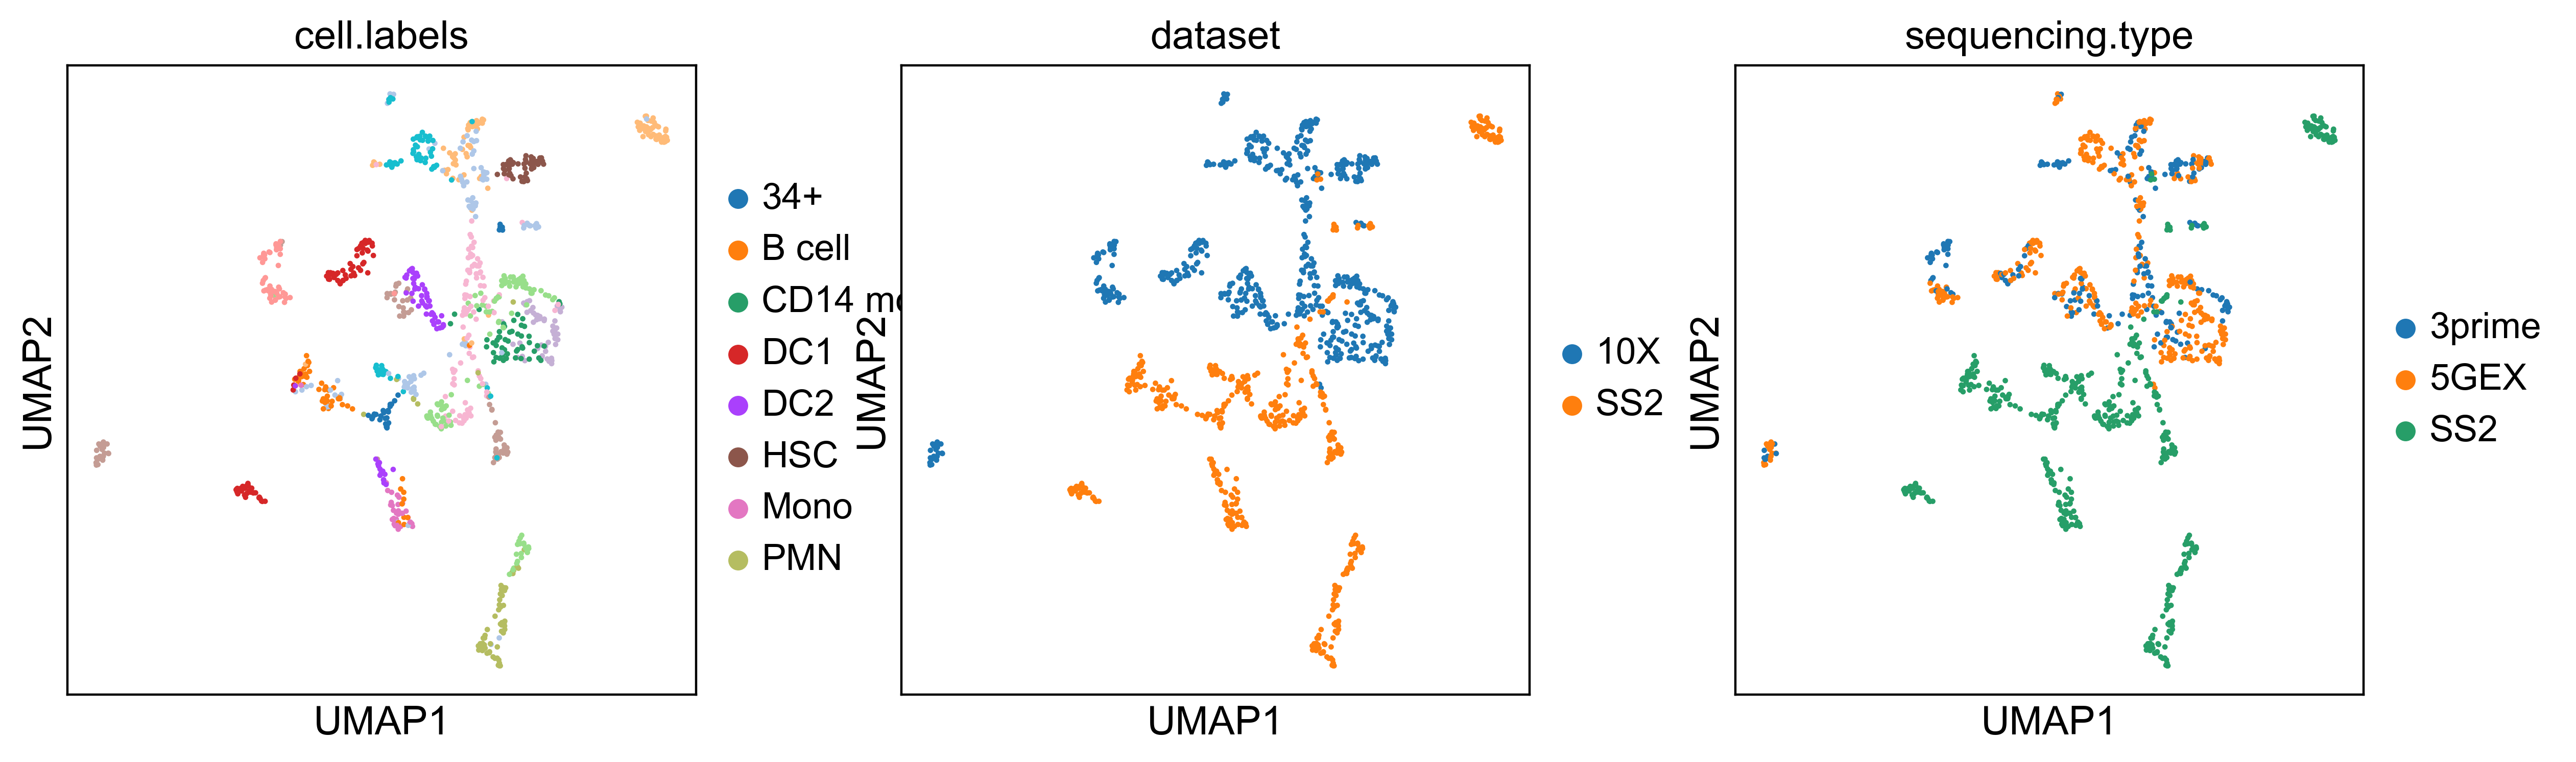

In [54]:
sc.pl.umap(adata, color=["cell.labels", "dataset", "sequencing.type"], size=15)

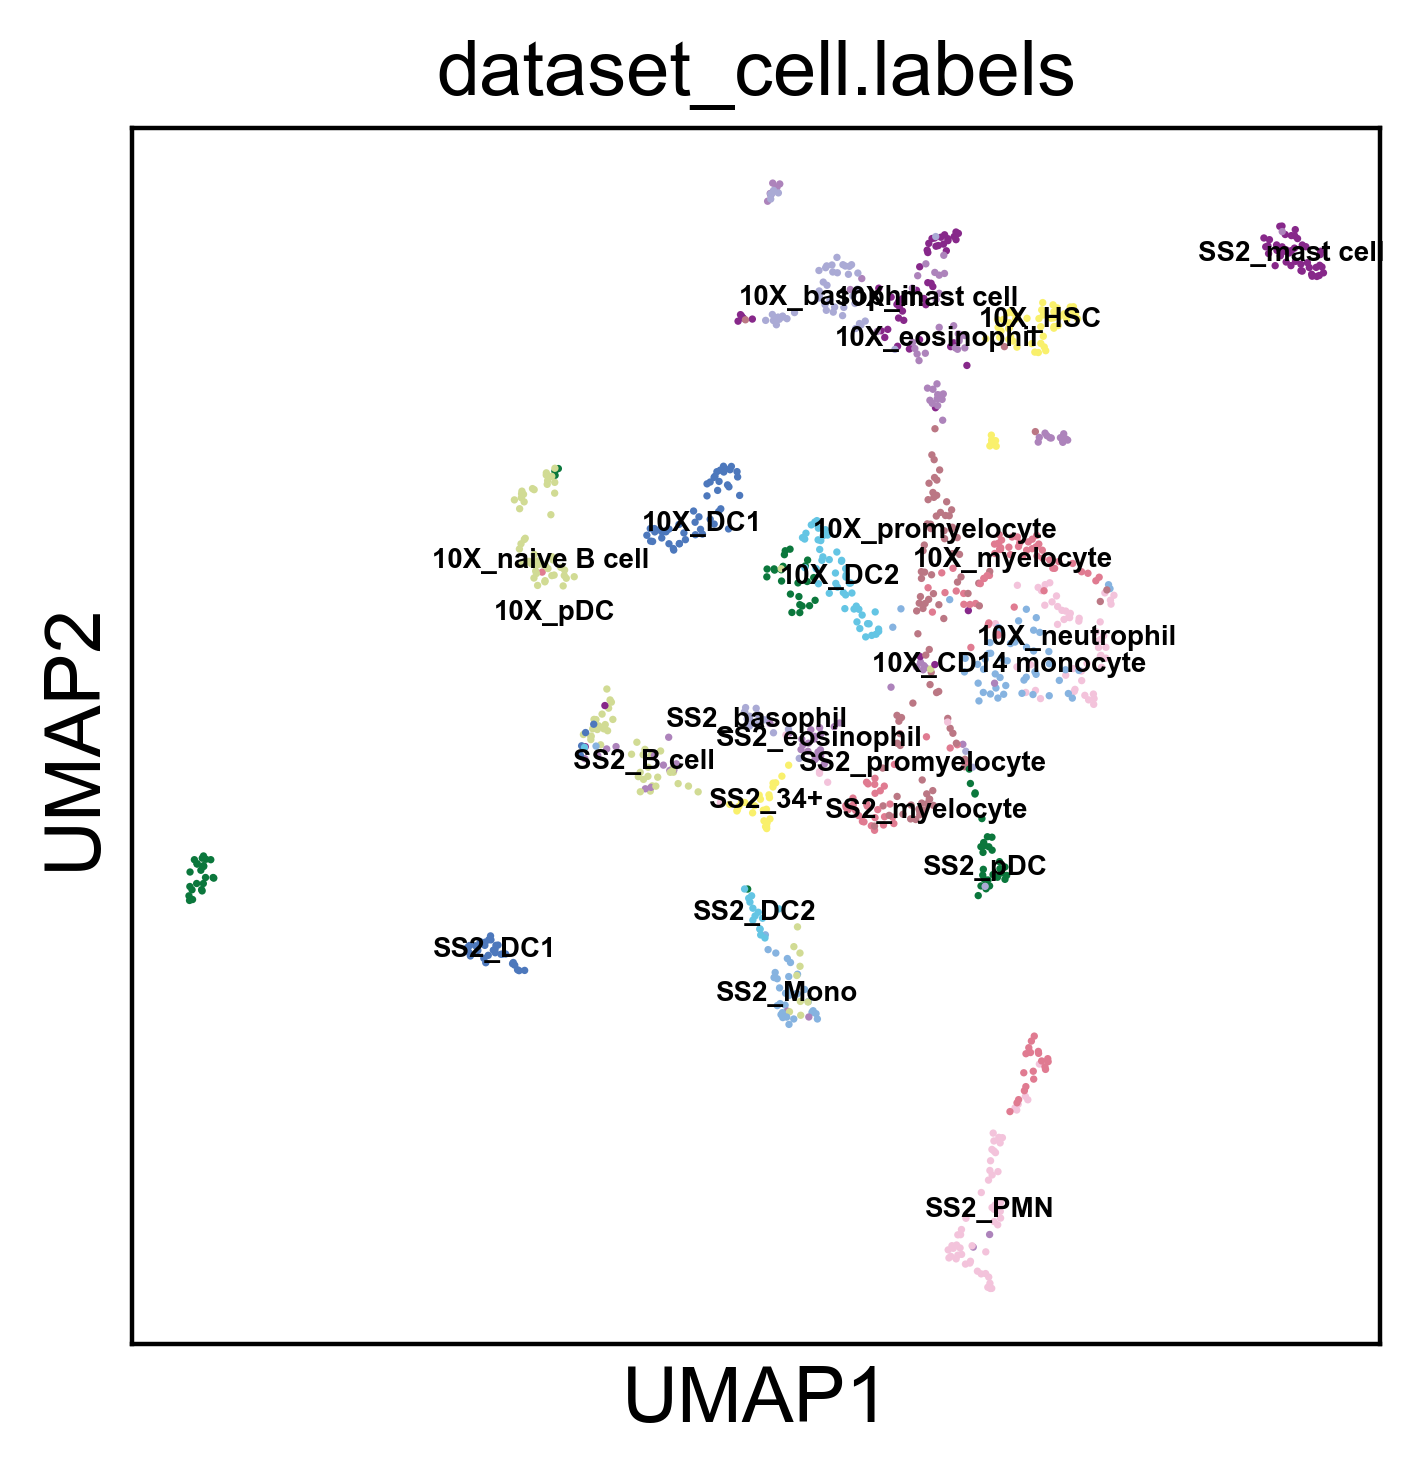

In [55]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7, legend_loc="on data", legend_fontsize=5)

# Plot dimensional reduction pre harmony

In [56]:
## UMAP
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_pre-harmony_20210105_dataset_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_pre-harmony_20210105_dataset_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

## UMAP
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_pre-harmony_20210105_seq_type_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_pre-harmony_20210105_seq_type_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_pre-harmony_20210105_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_pre-harmony_20210105_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Harmony batch correction by sample

In [57]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['sequencing.type']

In [58]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [59]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [60]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Recalculate PCs and other dimensional reduction coordinates based on harmony

In [61]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=15) 

In [62]:
# run umap
sc.tl.umap(adata) 

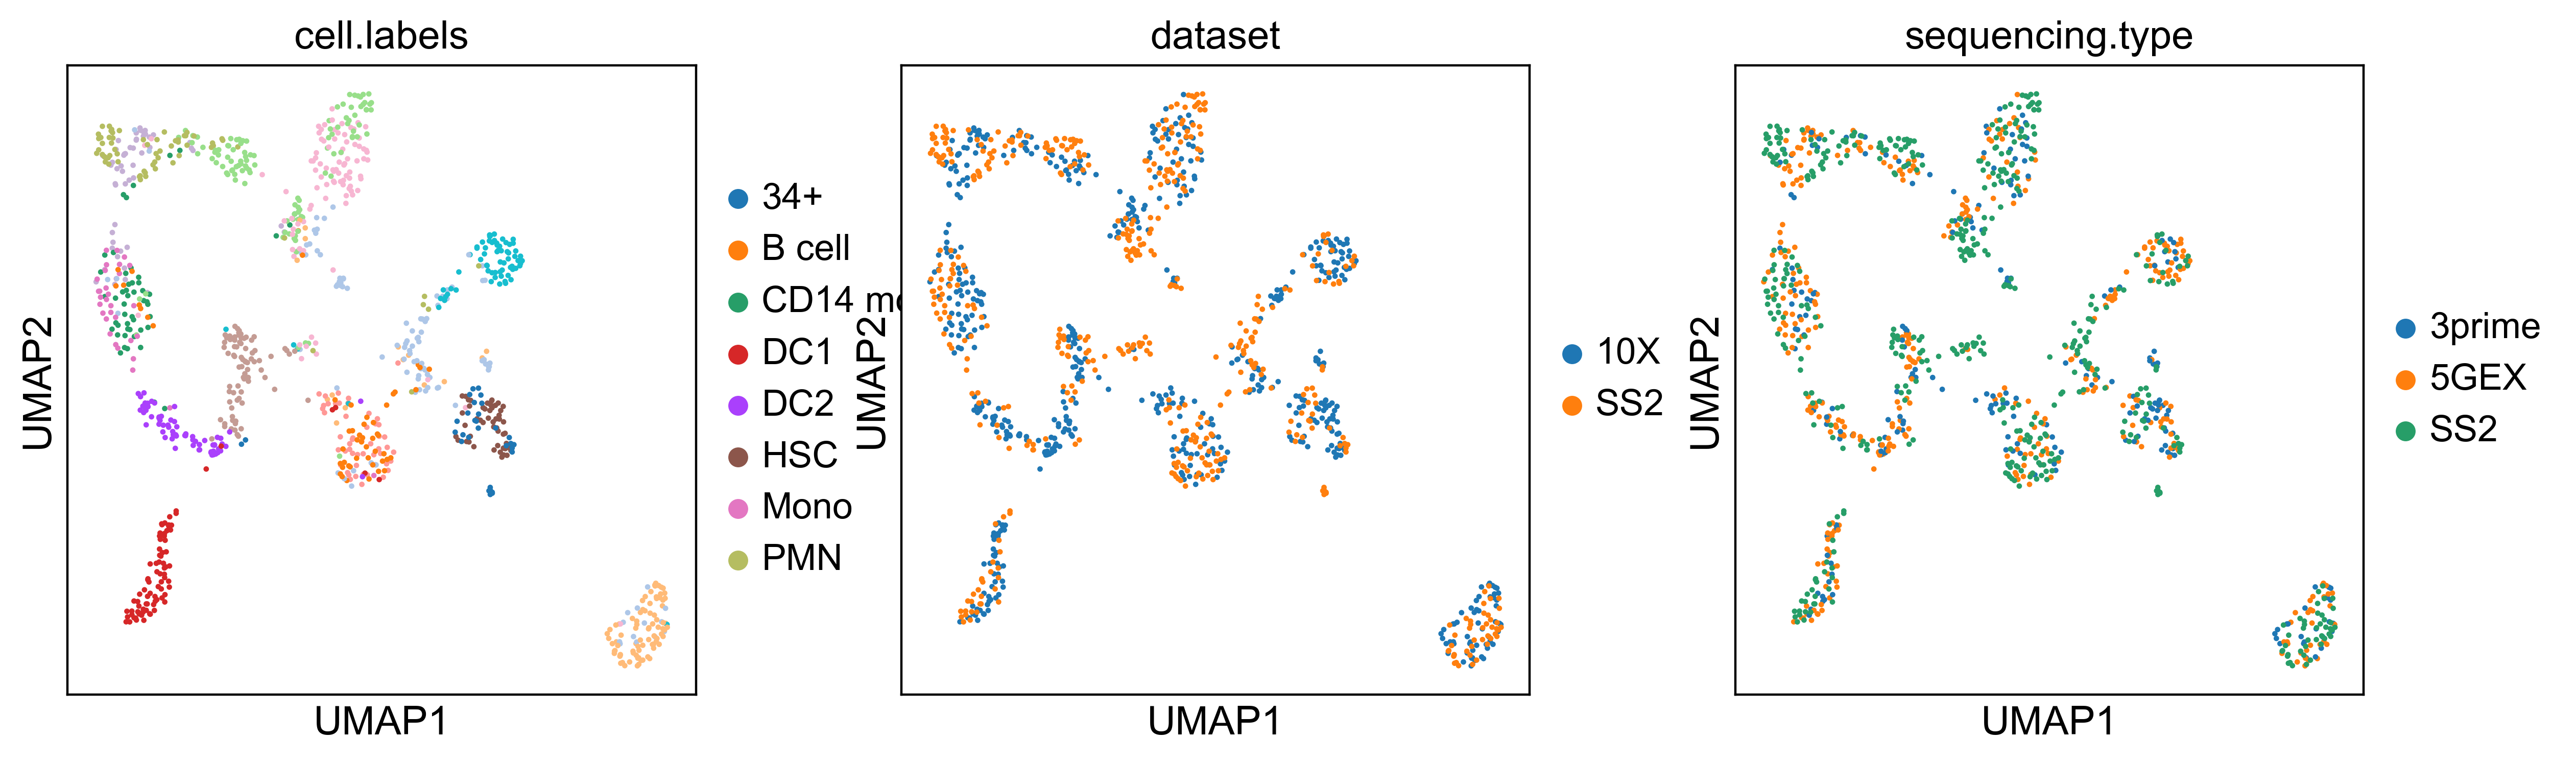

In [63]:
sc.pl.umap(adata, color=["cell.labels", "dataset", "sequencing.type"], size=15)

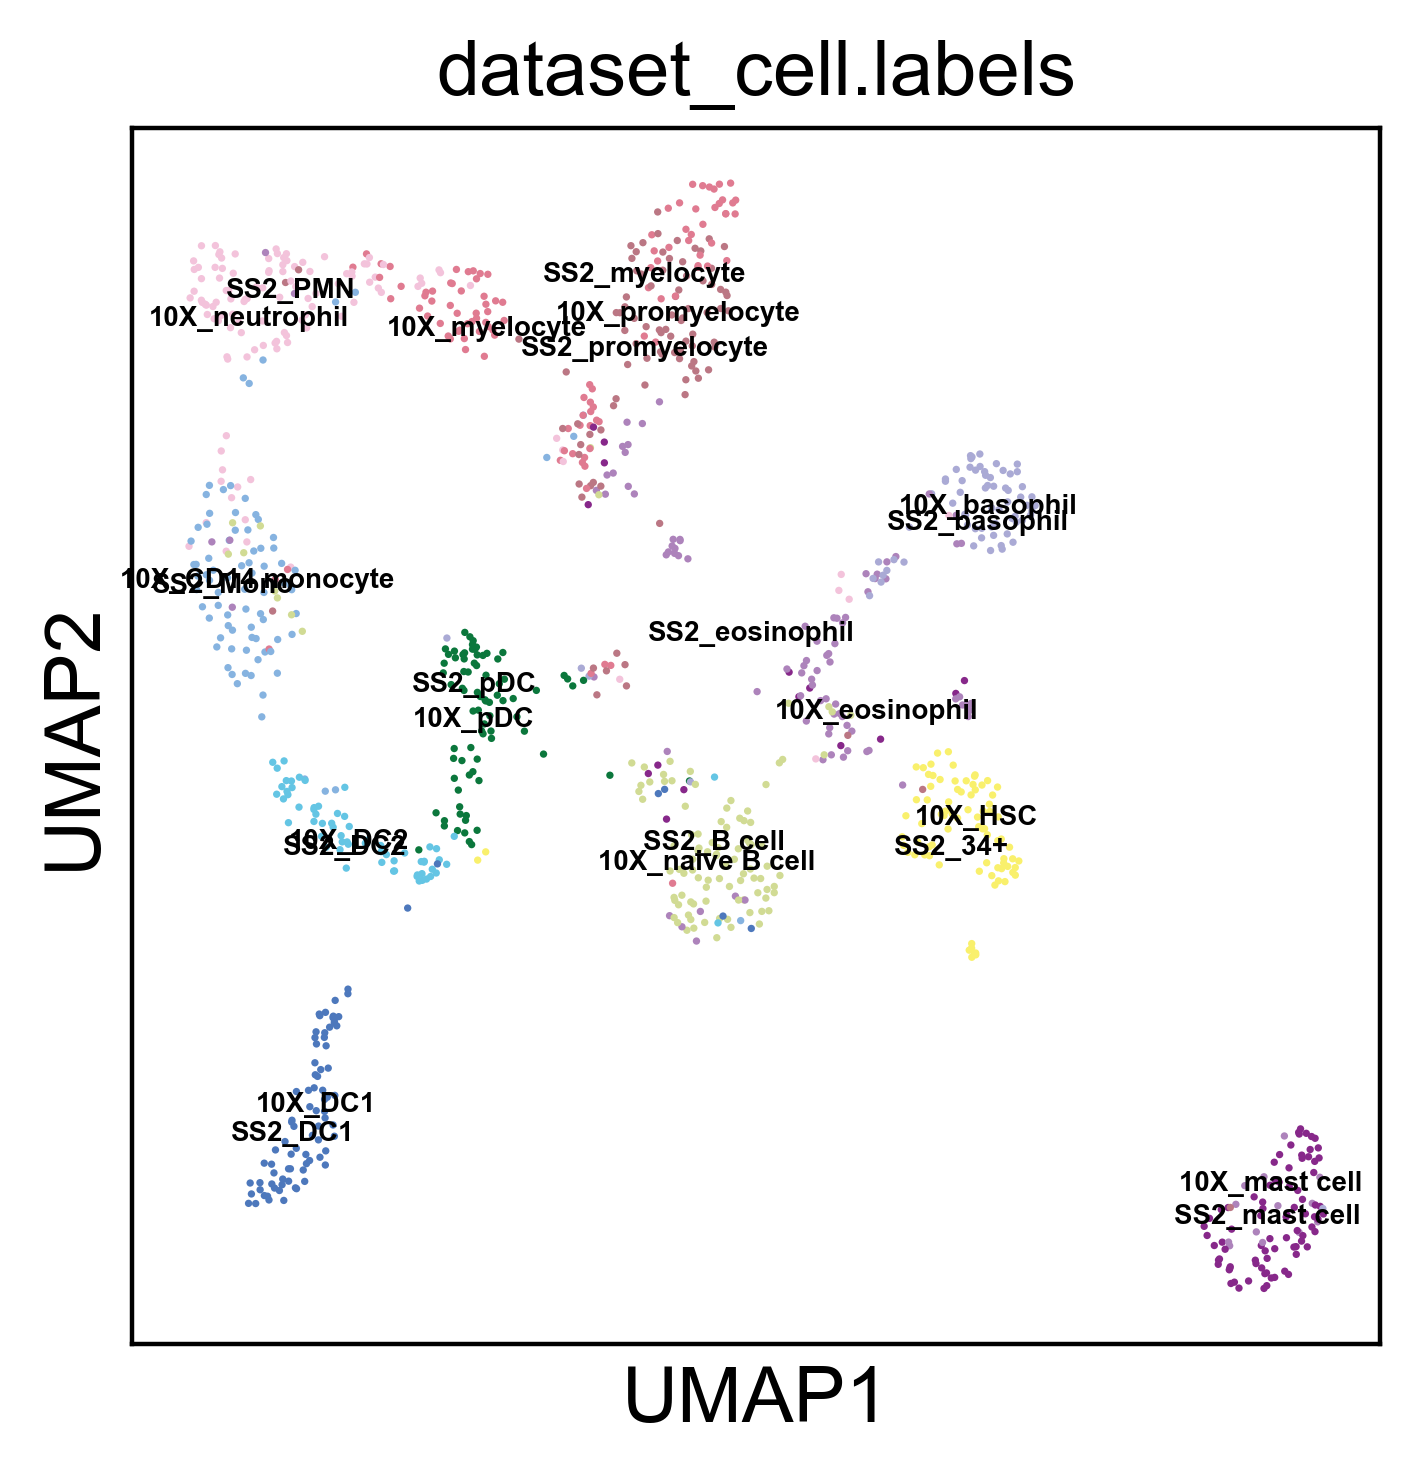

In [64]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7, legend_loc="on data", legend_fontsize=5)

# Plot UMAP after correction

In [65]:
cell_numbers = adata.obs.groupby(["dataset"]).apply(len)
cell_numbers

dataset
10X    600
SS2    486
dtype: int64

In [66]:
cell_numbers = adata.obs.groupby(["dataset", "orig.ident"]).apply(len)
cell_numbers

dataset  orig.ident
10X      F21            18
         F29            50
         F30            86
         F38            16
         F41            53
         F45            49
         F50           106
         F51           153
         SB19PCW        69
SS2      F83           334
         F90           152
dtype: int64

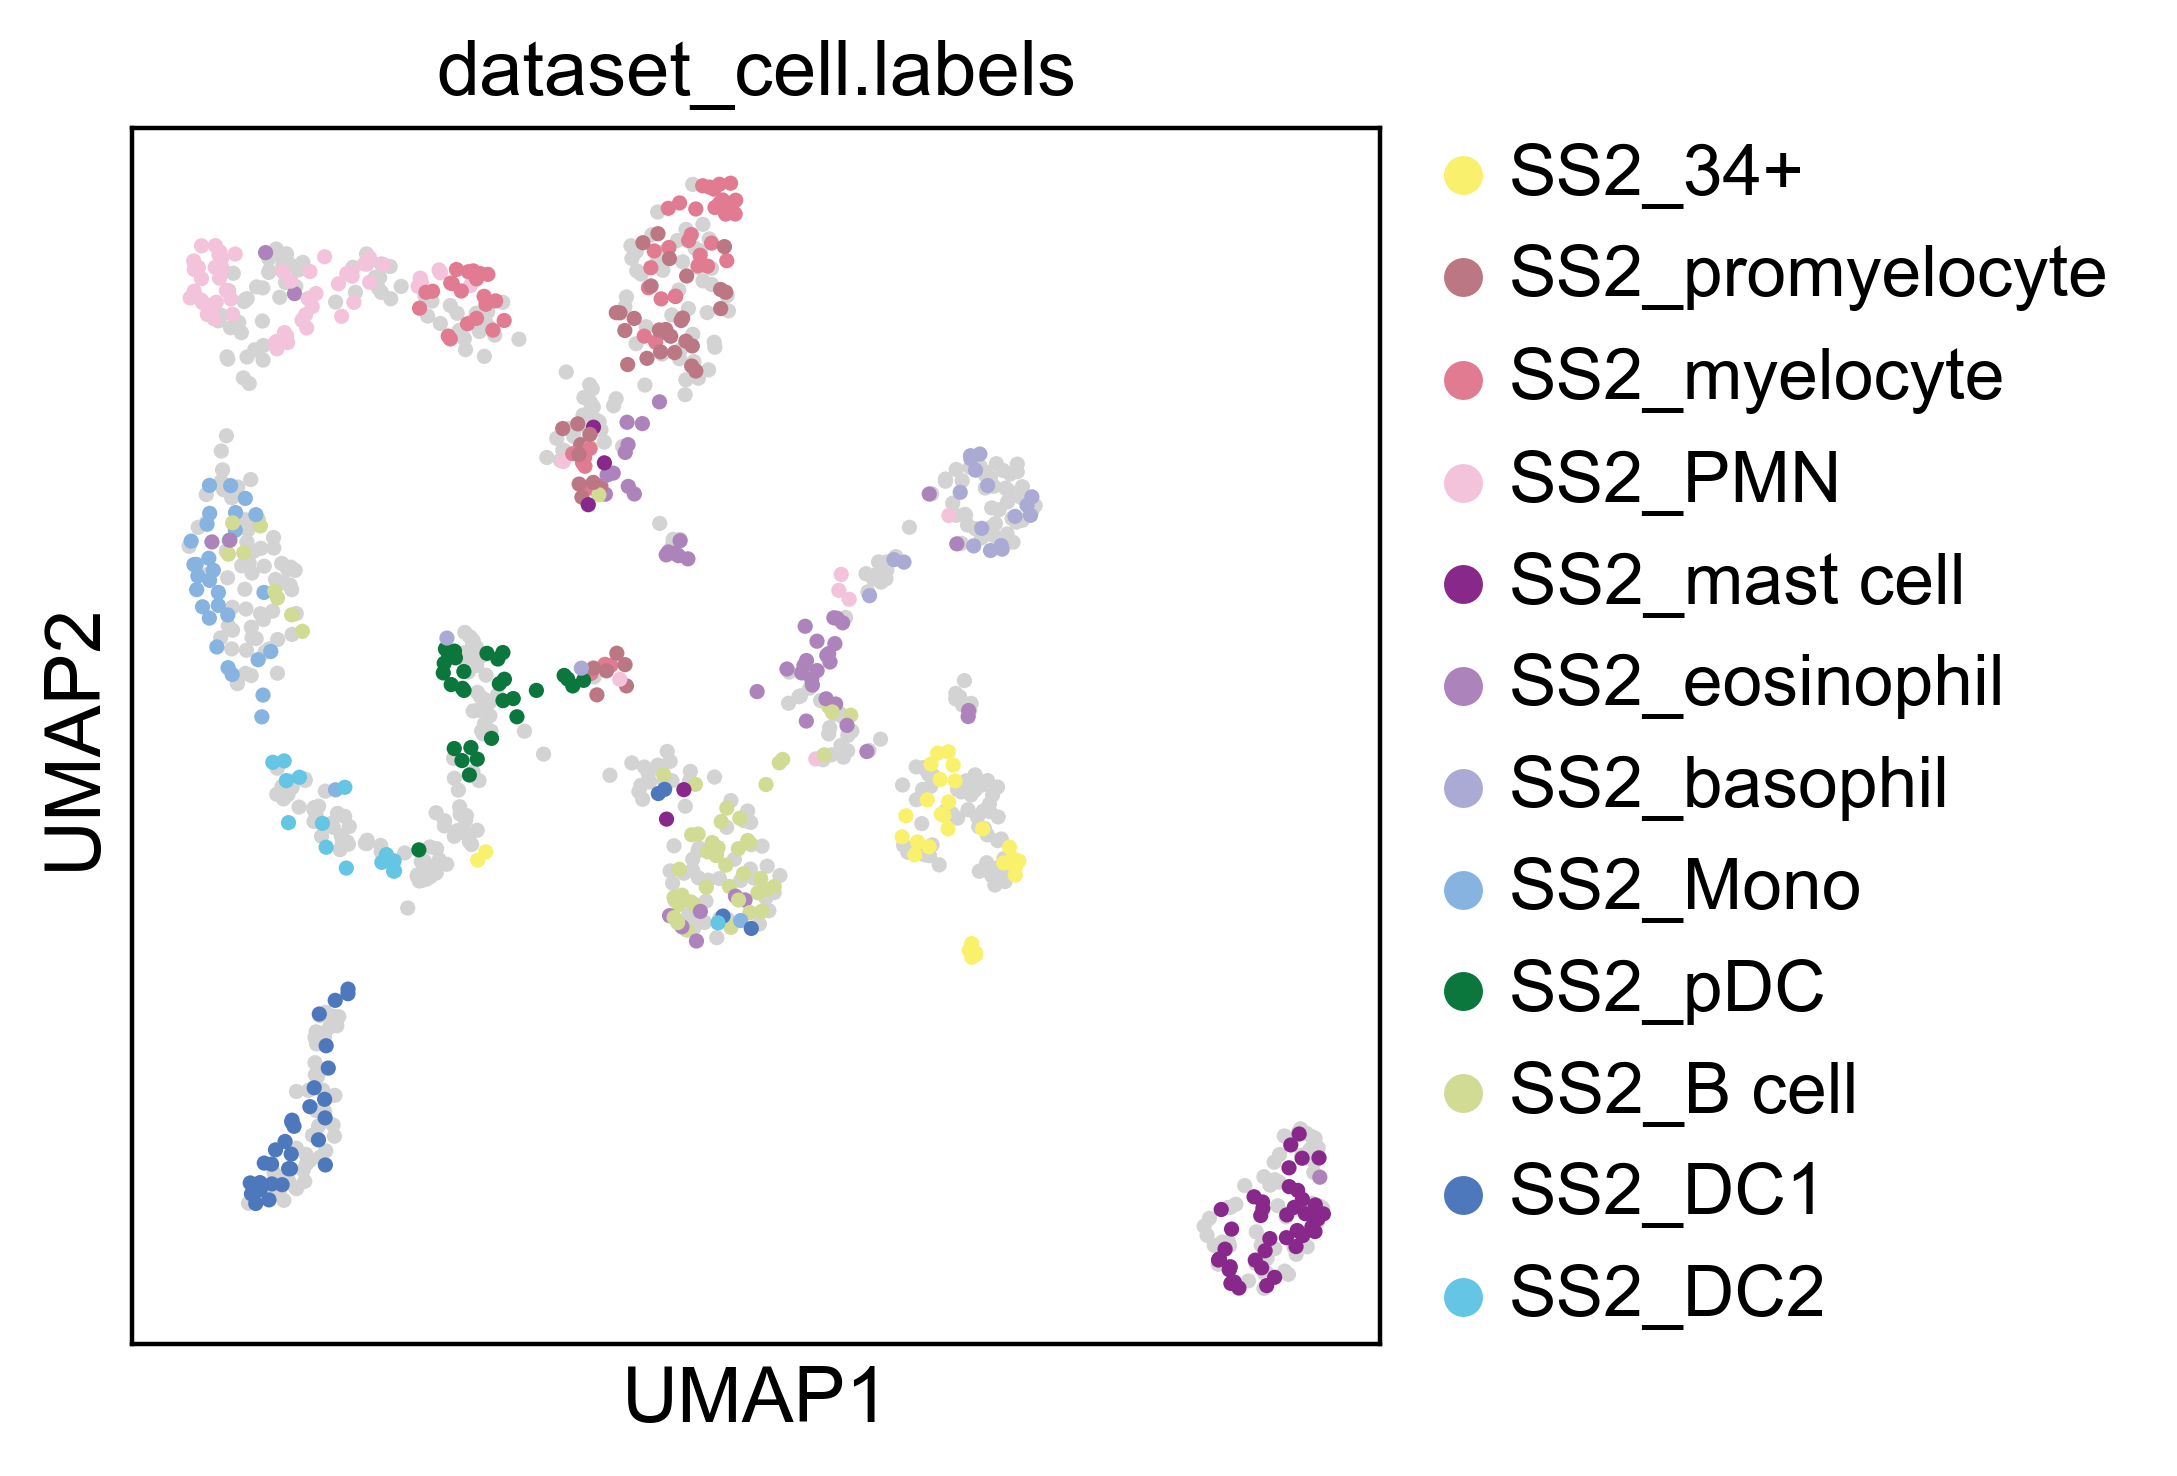

In [67]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=30,
          groups=['SS2_34+', 'SS2_promyelocyte', 'SS2_myelocyte', 
                  'SS2_PMN', 'SS2_mast cell', 'SS2_eosinophil', 
                   'SS2_basophil', 'SS2_Mono', 'SS2_pDC', 
                   'SS2_B cell', 'SS2_DC1', 'SS2_DC2'], 
           save="ss2_overlay_ss2_cells_20210105.pdf")

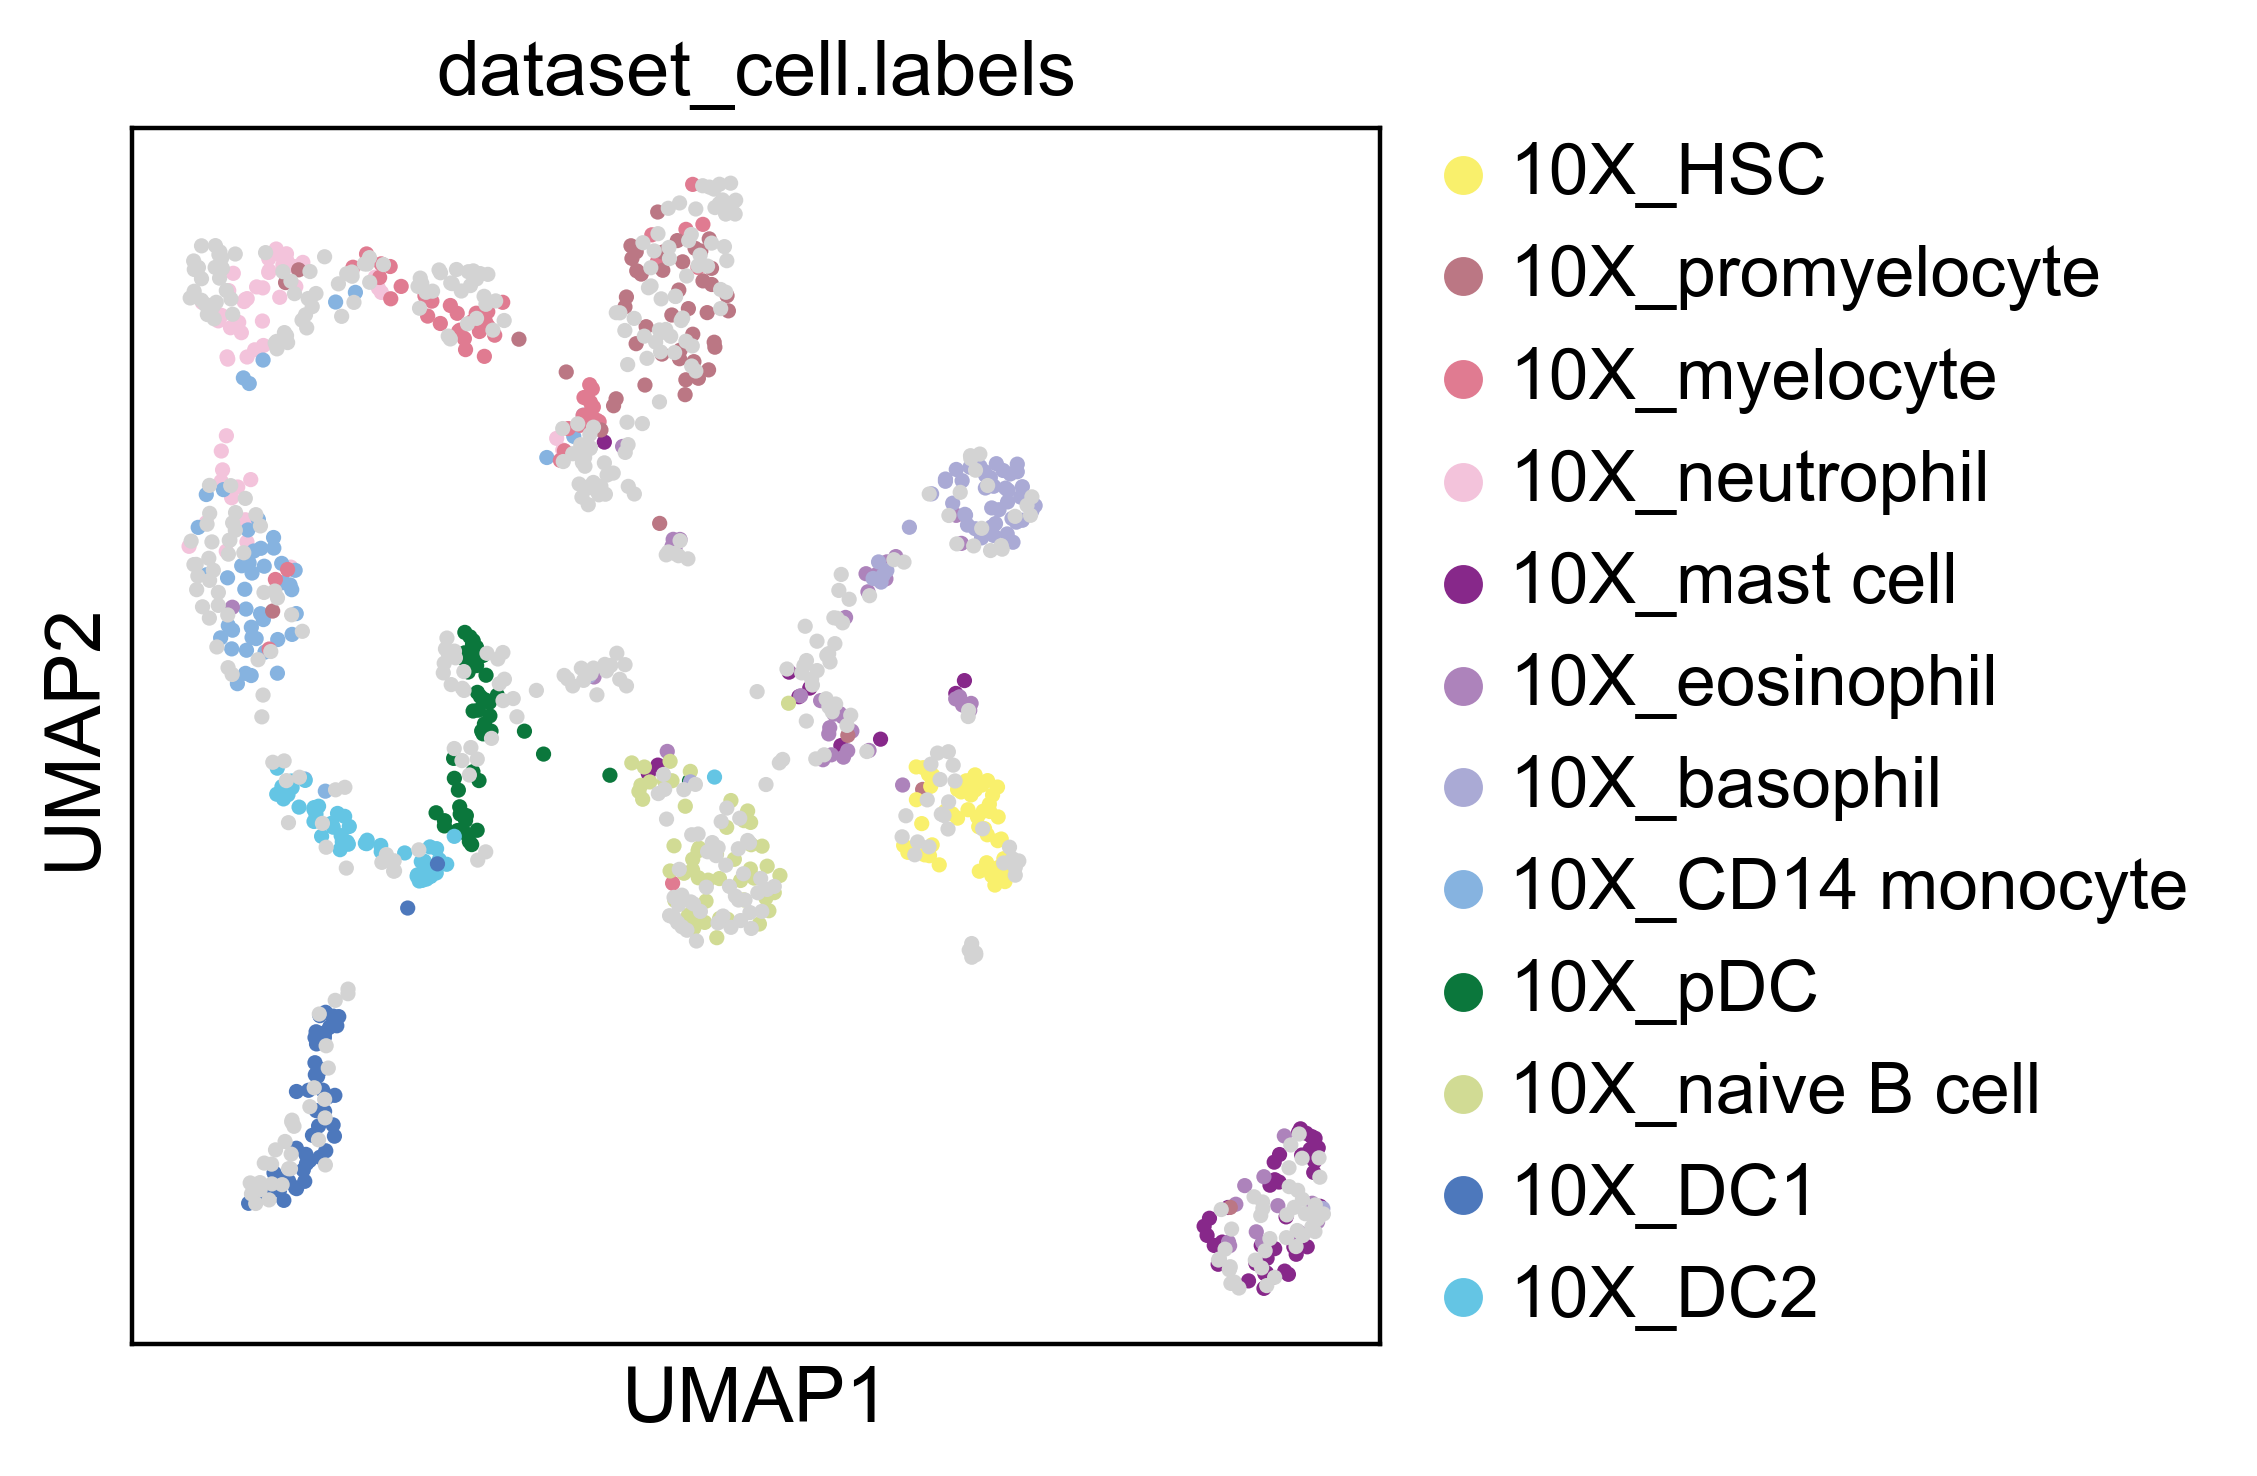

In [68]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=30,
          groups=['10X_HSC', '10X_promyelocyte', '10X_myelocyte', 
                  '10X_neutrophil', '10X_mast cell', '10X_eosinophil', 
                  '10X_basophil', '10X_CD14 monocyte', '10X_pDC', 
                  '10X_naive B cell', '10X_DC1', '10X_DC2'], 
           save="ss2_overlay_10x_cells_20210105.pdf")

# Save data

In [69]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [70]:
adata.X

<1086x42802 sparse matrix of type '<class 'numpy.float32'>'
	with 2715547 stored elements in Compressed Sparse Row format>

In [71]:
adata.raw.X

<1086x67100 sparse matrix of type '<class 'numpy.float32'>'
	with 3000280 stored elements in Compressed Sparse Row format>

In [72]:
# save the adata with dr 
adata.write('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/ss2_validation_dr_20210105.h5ad')

... storing 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0' as categorical
... storing 'gene_id